In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.sparse as sp
import scipy.sparse.linalg 
import scipy.linalg as la
from numpy import zeros
import pandas as pd
from math import erfc
from plotly.subplots import make_subplots
import plotly.io as pio
from matplotlib import rc

In [18]:
tmin = 0.
tmax = 5 # Tempo total de análise - 24 hrs = 1440 min
dt = 0.01 # Passo no tempo dt = 10min
nt = int(tmax/dt) # Número de iterações no tempo
t = np.arange(tmin, tmax, dt) # vetor tempo para plotar

xmin = 0.
xmax = 10.0 # Distância total percorrida - m
dx = 0.02 # Passo no espaço - m
nx = int(xmax/dx) # Número de pontos em x, considera x=0 e x=xmax
x = np.arange(xmin, xmax, dx)

def a (R,x,D,t,v):
    a = (1/2)*erfc((R*x - v*t)/(2*(D*R*t)**(1/2))) + (1/2)*np.exp(v*x/D)*erfc((R*x - v*t)/(2*(D*R*t)**(1/2)))
    return a

def analitica (a, ci, co):
    c = ci +(co-ci) * a
    return c

for i in range (len(x)):
    p = analitica(a(1,i*dx,1,250,1),0,35)
p

755695.9392397162

In [13]:
# Determinando numérica da analítica
#===============================================================
# Defining parameters
#===============================================================
# v = 1
# D = 0.01
# R = 3
R = 1
# gamma = 0.7
# mu = 0.25
c0 = 35
ci = 0

tmin = 0.
tmax = 5 # Tempo total de análise - 24 hrs = 1440 min
dt = 0.01 # Passo no tempo dt = 10min
nt = int(tmax/dt) # Número de iterações no tempo
t = np.arange(tmin, tmax, dt) # vetor tempo para plotar

xmin = 0.
xmax = 10.0 # Distância total percorrida - m
dx = 0.02 # Passo no espaço - m
nx = int(xmax/dx) # Número de pontos em x, considera x=0 e x=xmax
x = np.arange(xmin, xmax, dx)

#===============================================================
# Definir componentes da matriz tridiagonal (A*u = b) -> vetor b
#===============================================================

b = np.zeros(nx)

# Aplicar condição inicial 

ci = 0 # c(x.t=0) = 0

def CI(x):                                                 # define a condição inicial
    if xmin <= x <= xmax:
        return ci          

for i in range(nx):                                         # monta a condição inicial
   xi = i*dx
   b[i] = CI(xi)

# Aplicar as condições de contorno 

b[0] = c0 # c(x=1, t) = 35
b[nx-1] =  0 # dcdx = 0 

#===============================================================
# # Definir matriz tridiagonal de solução (A)
#===============================================================

D = 0.01
v = 1
k1 = (-D/(dx**2)) - v/(2*dx)
k2 = 2*R/dt + 2*D/(dx**2)
k3 = -D/(dx**2) + v/(2*dx)
k4 = D/(dx**2) + v/(2*dx)
k5 = -2*D/(dx**2) + 2*R/(dt)
k6 = D/(dx**2 - v/(2*dx))

A = (sp.eye(nx, k=-1)*k1 + sp.eye(nx)*k2 + sp.eye(nx, k=1)*k3) # Matriz de solução (A)
A = sp.lil_matrix(A)

B = (sp.eye(nx, k=-1)*k4 + sp.eye(nx)*k5 + sp.eye(nx, k=1)*k6)
B = sp.lil_matrix(B)

       
A[0,0] = 1
A[0,1] = 0
A[nx-1,nx-1] = 2*R/dt + 2*D/(dx**2)
A[nx-1,nx-2] = -2*D/(dx**2)
    
B[0,0] = 1
B[0,1] = 0
B[nx-1,nx-1] =  2*R/dt - 2*D/(dx**2)
B[nx-1,nx-2] = 2*D/(dx**2)

# print(A.todense())   

In [14]:
#===============================================================
# Iterações no tempo e no espaço
#===============================================================

# rows,cols = A.nonzero() # define as coordenadas dos valores não nulos

dummy_answer = zeros([nt, nx])
dummy_answer[0,:] = b

for n in range(1,nt-1):
          
    u = sp.linalg.spsolve(A, B.dot(b))
    print(u)
    
    dummy_answer[n,:] = u 
    
    b = u
    


c:\Users\Nathan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


[3.50000000e+001 1.40000000e+001 2.80000000e+000 5.60000000e-001
 1.12000000e-001 2.24000000e-002 4.48000000e-003 8.96000000e-004
 1.79200000e-004 3.58400000e-005 7.16800000e-006 1.43360000e-006
 2.86720000e-007 5.73440000e-008 1.14688000e-008 2.29376000e-009
 4.58752000e-010 9.17504000e-011 1.83500800e-011 3.67001600e-012
 7.34003200e-013 1.46800640e-013 2.93601280e-014 5.87202560e-015
 1.17440512e-015 2.34881024e-016 4.69762048e-017 9.39524096e-018
 1.87904819e-018 3.75809638e-019 7.51619277e-020 1.50323855e-020
 3.00647711e-021 6.01295421e-022 1.20259084e-022 2.40518169e-023
 4.81036337e-024 9.62072674e-025 1.92414535e-025 3.84829070e-026
 7.69658139e-027 1.53931628e-027 3.07863256e-028 6.15726512e-029
 1.23145302e-029 2.46290605e-030 4.92581209e-031 9.85162418e-032
 1.97032484e-032 3.94064967e-033 7.88129935e-034 1.57625987e-034
 3.15251974e-035 6.30503948e-036 1.26100790e-036 2.52201579e-037
 5.04403158e-038 1.00880632e-038 2.01761263e-039 4.03522527e-040
 8.07045053e-041 1.614090

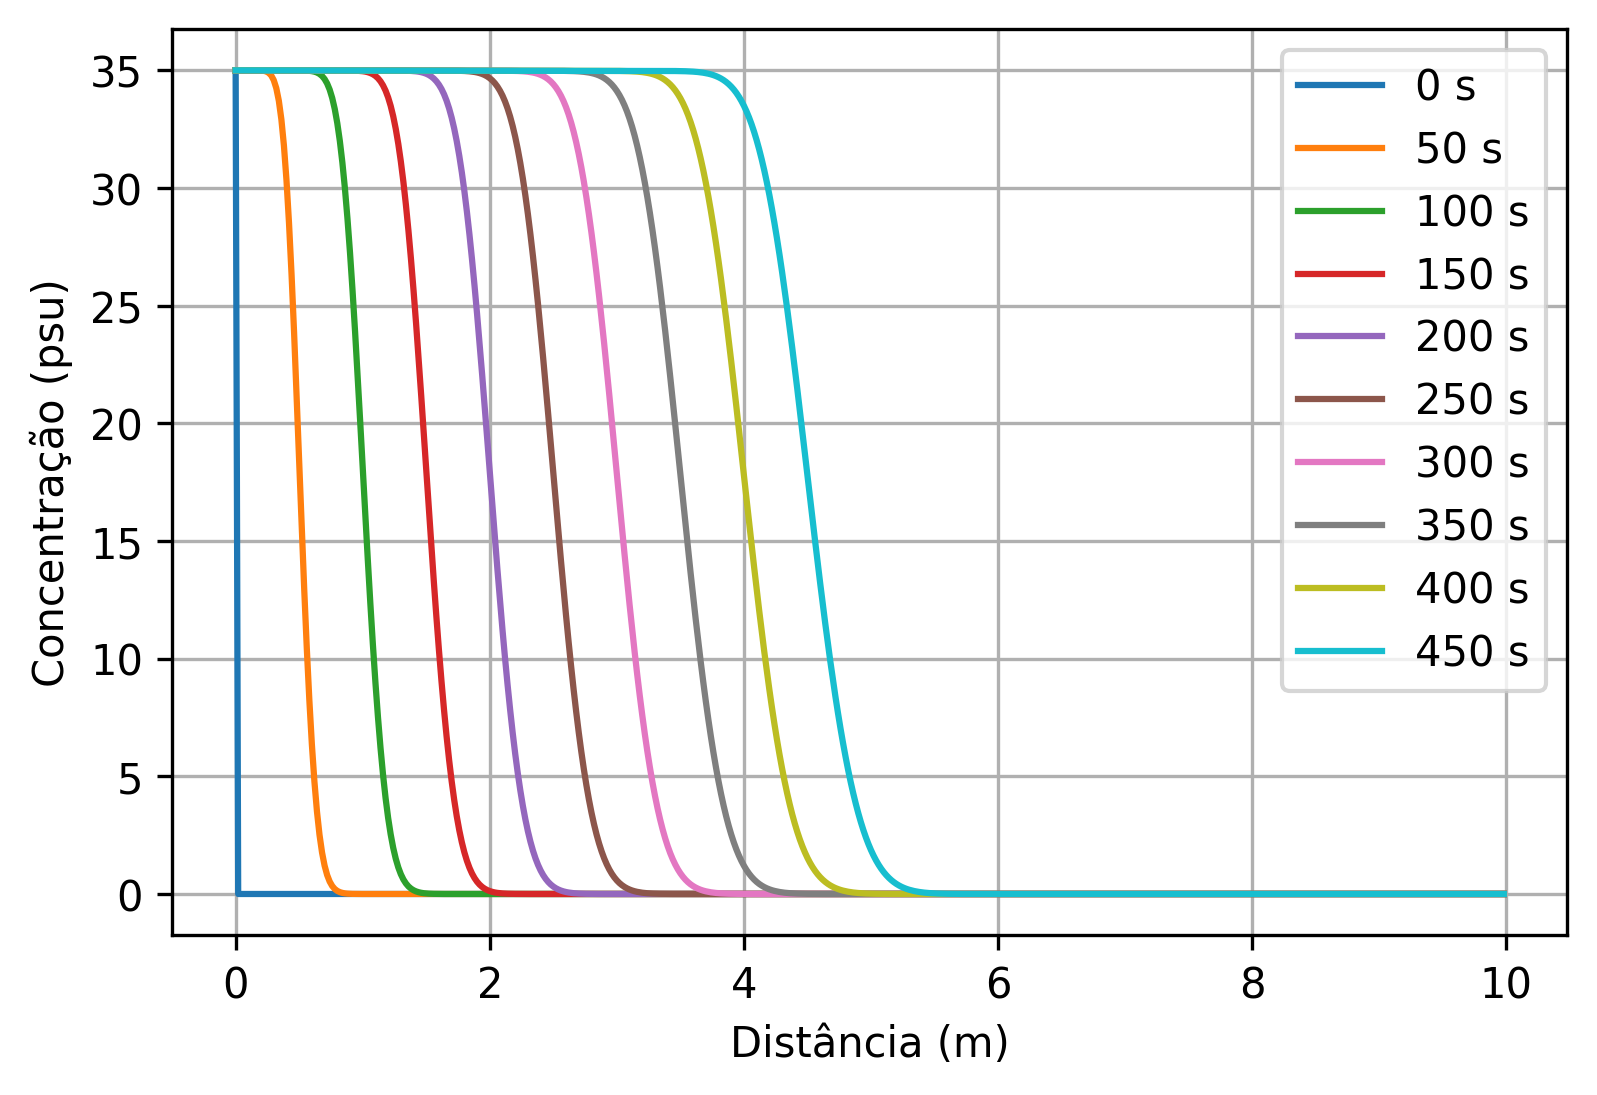

In [16]:
plt.figure(num=1, dpi=300)
for i in range (0, len(t),50):
    # if i % 20 == 0:
    plt.plot(x, dummy_answer[i,:], label=f'{int(i)} s')
# plt.xlim(0,1000)
plt.xlabel('Distância (m)')
plt.ylabel('Concentração (psu)')
plt.legend()
plt.grid()
# plt.savefig('figura_final.png')